In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator,QiskitRuntimeService
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import transpile

import qiskit
print(qiskit.__version__)

2.2.1


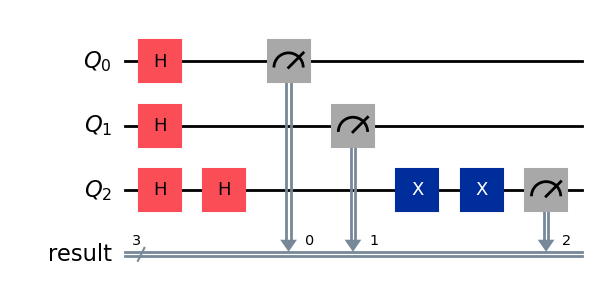

In [20]:
Qbit= QuantumRegister(3,name='Q')
Cbit= ClassicalRegister(3,name='result')
qc= QuantumCircuit(Qbit,Cbit)

qc.h(Qbit)
qc.h(Qbit[2])
qc.x(Qbit[2])
qc.x(Qbit[2])
qc.measure(Qbit,Cbit)

qc.draw(output='mpl')


We are using the aer_simulator quantum computer
<class 'dict'>
{'010': 242, '011': 251, '000': 261, '001': 270}
0


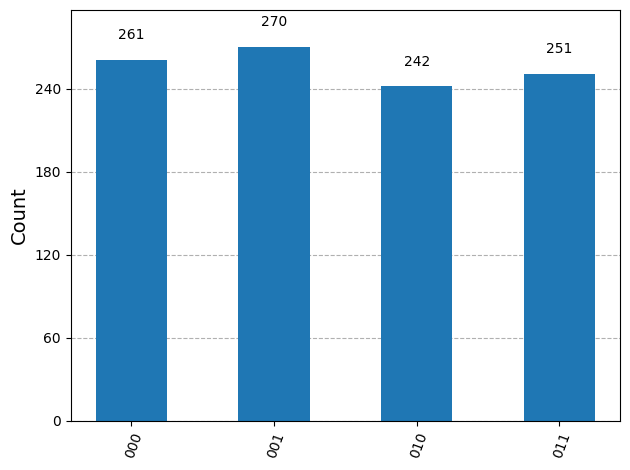

In [21]:
transpiled_qc= transpile(qc)
service = QiskitRuntimeService(name="qiskit_adi")

# Get a backend

backend = AerSimulator()
#backend = service.least_busy(operational=True, simulator=False)
#backend= service.backend(name='ibm_torino')
print(f"We are using the {backend.name} quantum computer")

sampler = Sampler(mode=backend)
# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
job = sampler.run(pm.run([transpiled_qc]),shots=1024)

# Get the results
results = job.result()[0].data

counts= results.result.get_counts()

print(type(counts))
num_1=0
for key,value in counts.items():
    if key[0]== '1':
        num_1+=value
print(counts)
print(num_1)
plot_histogram(counts)